In [3]:
import matplotlib
font = {'family' : 'serif',
		'serif' : 'Computer Modern Sans serif',
		'size'   : 21}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['lines.linewidth'] = 2.4
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import FourierClass as FC
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(Fig)
import gadget

import scipy.optimize
import re

In [4]:
folder = '/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15/'
# folder = '/home/kristian/Analysis/SnapsTest/PerseusCorrect/R7/E45/X5M1ASFCMy15Ver2020Up10p3p2020/output/'
snap = Fig.quickImport(0, folder=folder)
print(snap.boxsize, snap.center)

/home/kristian/analysis/TestSim/R7E45X5M1ASFCMy15//snap_000.hdf5
generalInfo time:  0.0 Myr
1.4925373134328357 [0.74626866 0.74626866 0.74626866]


In [5]:
print('smallest grid cell dx=%g' %np.min(snap.vol**(1/3)))
N = 1024
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))
N = 64
print('largest box size to resolve grid assuming N=%i, L=%g' %(N, np.min(snap.vol**(1/3))*N))

smallest grid cell dx=0.000836263
largest box size to resolve grid assuming N=1024, L=0.856334
largest box size to resolve grid assuming N=64, L=0.0535209


In [6]:
INFO = {}
INFO['constBXB'] = 0.05
snap.data['SqrtConsEpsB'] = aux.get_value('SqrtAbsoluteConstantMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['SqrtEpsB'] = aux.get_value('SqrtMagneticFieldEnergyDensity', snap, INFO=INFO)
snap.data['DistInKpc'] = aux.get_value('DistanceToCenterInKpc', snap, INFO=INFO)

SqrtAbsoluteConstantMagneticFieldEnergyDensity
const B field: X_B=0.05
considering constant magnetic field with x_B=0.05 taking density/temperature from /home/kristian/analysis/analyze_bubblepaper/Data/ICProfile/IC_profile_Perseus_R_rho_u_codeunits.txt
using center of snapshot
(0.0003000341091166092, 0.000300029902990299)


/home/kristian/analysis/analyze_bubblepaper/auxiliary_functions.py:437: UserWarning: dx cannot be larger than d_radius
  warnings.warn('dx cannot be larger than d_radius')


(0.0003000341091166092, 0.000300029902990299)
SqrtMagneticFieldEnergyDensity
DistanceToCenterInKpc
using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1489.55 min 3.06159


In [7]:
NBins = 100
vrange = [None, None]
log = True
typeCalc = 'mean'
errbar = 'percentiles'
v = 0
Colors = ['#003E51','black','#F0CF67']
Colors2 = ['#006073', '#FFB554', '#F4988A', '#83BF56']
res = 128
ProjBox = 0.035

# vrange = [1e-4, ProjBox/2.]
vrange = [1, 0.035/2*1e3]

In [8]:
RadSqrtEpsB = Fig.do_Radprof(snap,snap.data['SqrtEpsB'],weight=snap.data['vol'],range=vrange,log=log,
                NBins=NBins,typeCalc=typeCalc, errbar=errbar, return_binedges=False, 
                SameNumberPointsPerBin=False, return_errbar=1, v=v)
RadSqrtConsEpsB = Fig.do_Radprof(snap,snap.data['SqrtConsEpsB'],weight=snap.data['vol'], range=vrange, log=log,
                    NBins=NBins, typeCalc=typeCalc, errbar=errbar, return_binedges=False,
                    SameNumberPointsPerBin=False, return_errbar=1, v=v)

INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}


In [9]:
field = Fig.getAgrid(snap, 'SqrtEpsB', res=res, ProjBox=ProjBox, verbose=v)
fieldWeights = Fig.getAgrid(snap, 'vol', res=res, ProjBox=ProjBox, verbose=v)
dist = Fig.getAgrid(snap, 'DistInKpc', res=res, ProjBox=ProjBox, verbose=v)
RadSqrtEpsBBinned = Fig.do_Radprof(dist, field, weight=fieldWeights, range=vrange, log=log,
                    NBins=NBins, typeCalc=typeCalc, errbar=errbar, return_binedges=False,
                    SameNumberPointsPerBin=False, return_errbar=1, v=v)

using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
using boxsize/2 as center for grid!
center [0.7462686567164178, 0.7462686567164178, 0.7462686567164178]
INFO is None: set;  {'percentilesweightedLowerBoundary': 0.1, 'percentilesweightedUpperBoundary': 0.9, 'percentilesLowerBoundary': 0.1, 'percentilesUpperBoundary': 0.9}


### Radial profile of gridded data points differs slightly from radial profile of raw data points

axesSize [0.12, 0.12, 0.87, 0.87]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


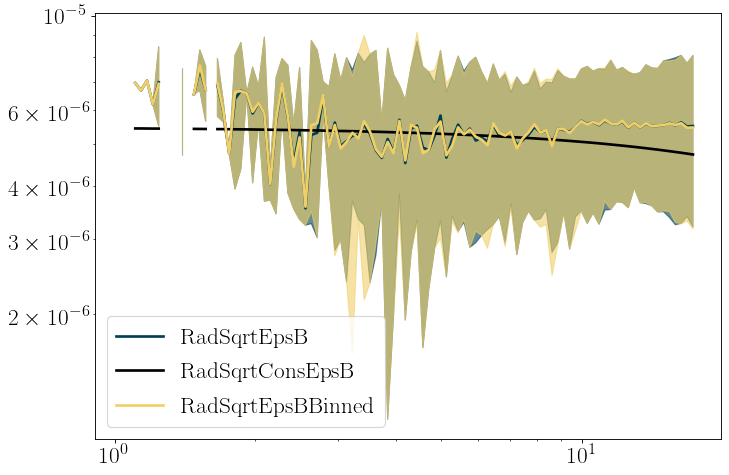

In [10]:
fig, ax = Fig.getFigure(legendExternal=False, secondXaxis=True)
for rad, name, color in zip([RadSqrtEpsB, RadSqrtConsEpsB, RadSqrtEpsBBinned], ['RadSqrtEpsB', 'RadSqrtConsEpsB', 'RadSqrtEpsBBinned'], Colors):
    plot = ax.plot(rad[0], rad[1], color=color, label=name)
    plot = ax.fill_between(rad[0], rad[2][0], rad[2][1], alpha=0.6, color=color)            
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

### Approximating profile as single beta profile (as analytical solution for Fourier transform available)

In [11]:
def getFunctionY(x, a, b, c):
    return a*(1.+(x/b)**2)**(-c)
def getFunction(x, a, b, c):
    return x, getFunctionY(x, a, b, c)
def getFunctionDeriv(x, a, b, c):
    return -(2*a*c*x*(1 + x^2/b^2)^(-1-c))/b^2
def getFTFunction(ks, a, b, c):
	import scipy.special
	#assumes profile in real space: a*(1+(x/b)^2)^(-c)
# 	print('PressureFourierTransTheoretical: assuming units(distance); cm')
	return ks, 2**(1.-c)*a/(b**2)**(-1./4.-c/2.)*abs(ks)**(-1./2.+c)*scipy.special.kv(1./2.-c, np.array(abs(ks)*abs(b)), dtype=np.complex)/scipy.special.gamma(np.complex(c))

$P(x)=a\left(1+\left(\frac{x}{b}\right)^2\right)^{-c} \\
P^\prime(x)=-\frac{2 a c x \left(1 + \left(\frac{x}{b}\right)^2\right)^{(-1 - c)}}{b^2} \\
\hat{P}(k)=\frac{2^{1-c}{a}{b^{2\left(\frac{1}{4}+\frac{c}{2}\right)}}|k|^{-\frac{1}{2}+c} K_v\left(\frac{1}{2}-c,k|b|\right)}{\Gamma(c)}$

In [12]:
# print(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB) bin_centresSqrtConsEpsB, statisticSqrtConsEpsB,
# paras, success = aux.fitFunction(bin_centresSqrtConsEpsB, statisticSqrtConsEpsB, [5e-6, 40., 1.], getFunctionY, alternative=False)
FitRadSqrtEpsB = scipy.optimize.curve_fit(getFunctionY, RadSqrtEpsB[0], aux.interpolateNans(RadSqrtEpsB[1]), p0=[5e-6, 50., 0.4], sigma=None, 
                                          bounds=(np.array([1e-6,1,0]),np.array([1e-5,100,4.])),
                                         maxfev=10000000000) 
perror = np.sqrt(np.diag(FitRadSqrtEpsB[1])) 
print(FitRadSqrtEpsB[0], perror)
FitSqrtEpsB = scipy.optimize.curve_fit(getFunctionY, snap.data['DistInKpc'], snap.data['SqrtEpsB'], p0=[5e-6, 50., 0.4], sigma=None, 
                                          bounds=(np.array([1e-6,1,0]),np.array([1e-5,100,4.])),
                                         maxfev=10000000000) 
perror = np.sqrt(np.diag(FitSqrtEpsB[1])) 
print(FitSqrtEpsB[0], perror)


Interpolating 7 nan values (fraction 0.0707071)
[5.e-06 5.e+01 4.e-01] [1.42605784e-07 3.24703130e+03 4.97631020e+01]
[5.15241849e-06 4.16313591e+01 3.63562037e-01] [3.76173603e-09 6.61327424e-02 1.34590209e-04]


axesSize [0.12, 0.12, 0.87, 0.76]


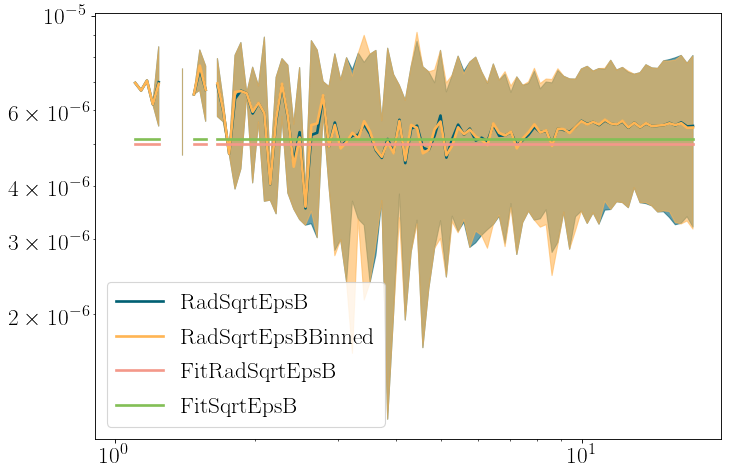

In [13]:
fig, ax = Fig.getFigure(legendExternal=False, secondXaxis=True)
for rad, name, color in zip([RadSqrtEpsB, RadSqrtEpsBBinned], ['RadSqrtEpsB', 'RadSqrtEpsBBinned'], Colors2[:2]):
    plot = ax.plot(rad[0], rad[1], color=color, label=name)
    plot = ax.fill_between(rad[0], rad[2][0], rad[2][1], alpha=0.6, color=color)            
for fit, name, color in zip([FitRadSqrtEpsB, FitSqrtEpsB], ['FitRadSqrtEpsB', 'FitSqrtEpsB'], Colors2[2:]):
    ax.plot(RadSqrtEpsB[0], getFunctionY(RadSqrtEpsB[1], *fit[0]), label=name, color=color)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()


In [24]:
importlib.reload(FC)
importlib.reload(aux)
INFO = {}
FTsnap = FC.getField(1, res, ProjBox/res, loadPlot=False, fieldType='Grid', plotField=False, snap=snap, variable='SqrtMagneticFieldEnergyDensity', INFO=INFO, Grid_xB=0.5)
INFO['Projection_resDepth'] = 128
INFO['MagneticFieldTurbulent_A'] =  1.0449804175789864e-06
importlib.reload(FC)
FTtheo = FC.getField(1, res, ProjBox/res, loadPlot=False, fieldType='Grid', plotField=False, snap=None, initializeVariableInKspace=True, variable='MagneticFieldTurbulent', INFO=INFO)


{'Grid_xB': 0.5}


TypeError: getAgrid() got an unexpected keyword argument 'xB'

axesSize [0.12, 0.12, 0.87, 0.76]
... saved figures/DataPlots/PW_SiThe_VaMagnFielTurb_FieTyGri_PS1_TyCalm_NBi50_n128_delta0p00027_33.hdf5
... saved figures/DataPlots/PW_Simh-kristian-analysis-TesSi_VaSqrMagnFielEnerDens_FieTyGri_PS1_TyCalm_NBi50_n128_delta0p00027_34.hdf5
A: 1.0449804175789864e-06
2 1 1 0


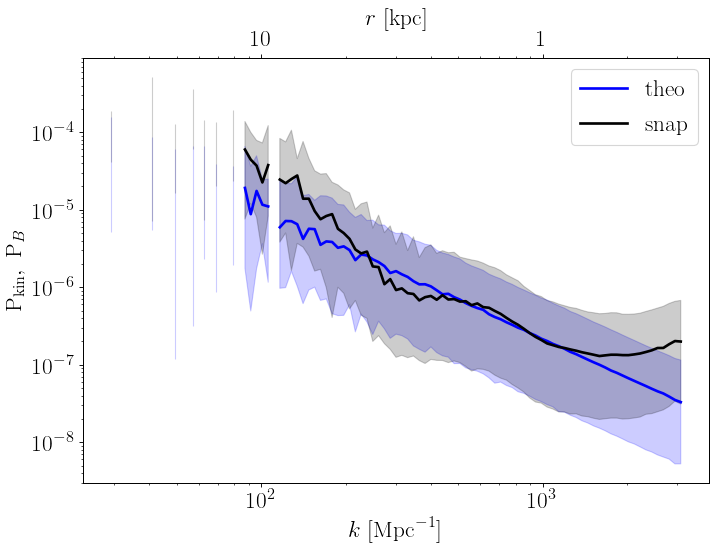

In [18]:
secondXaxis = True
xlog = True
Xrange = [None, None]
Yrange = [None, None]

fig, ax = Fig.getFigure(legendExternal=False, secondXaxis=secondXaxis)
FTtheo.plotFT(ax=ax, label='theo', color='blue', factor=1/np.sqrt(8*np.pi))
FTsnap.plotFT(ax=ax, label='snap')
print('A:', FTsnap.getAValue())
Fig.modifyPlot(ax, xlog=xlog, ylog=1, xlabel=r'$k\ [\mathrm{Mpc}^{-1}]$', ylabel=r'$\mathrm{P}_\mathrm{kin},\ \mathrm{P}_B$',
               Xrange=Xrange, Yrange=Yrange)

ax2 = Fig.getTwinX(ax, factor=1e3, xlog=xlog, xlabel=r"$r\ [\mathrm{kpc}]$")
ax.legend()

In [40]:
def f(a=1,b=2,dasdas='dasdasd',**da):
    print(locals()['da'])

In [41]:
f(caca=1321,apkdpakd=1,a=2,lala=41)

{'caca': 1321, 'apkdpakd': 1, 'lala': 41}


In [12]:
import matplotlib
font = {'family' : 'serif',
		'serif' : 'Computer Modern Sans serif',
		'size'   : 21}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['lines.linewidth'] = 2.4
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import FourierClass as FC
import auxiliary_functions as aux
import importlib
importlib.reload(aux)
importlib.reload(FC)
import gadget

import scipy.optimize
import re

NBins = 100
vrange = [None, None]
log = True
typeCalc = 'mean'
errbar = 'percentiles'
v = 0
Colors = ['#003E51','black','#F0CF67']
Colors2 = ['#006073', '#FFB554', '#F4988A', '#83BF56']
res = 128
ProjBox = 0.035

# vrange = [1e-4, ProjBox/2.]
vrange = [1, 0.035/2*1e3]
INFO = {}

In [13]:
importlib.reload(FC)

FTsnap = FC.FTstarter(3, 1, res, ProjBox/res, loadPlot=False, fieldType='Grid', plotField=False, snap=None, initializeVariableInKspace=True, variable='MagneticFieldTurbulent', INFO=INFO)

In [15]:
FTsnap.initializeKVectors()

no need to redo initializeKVectors 


In [1]:
dic1={}
dic1['a'] = 2
dic1['b'] = 4
dic2={}
dic2['b'] = 4
dic2['a'] = 2
dic1==dic2

True

In [70]:
import copy
dic3 = copy.deepcopy(dic1)
dic1['c'] = 4

In [71]:
dic3

{'a': 2, 'b': 4, 'c': 3}

In [72]:
dic1

{'a': 2, 'b': 4, 'c': 4}